In [1]:
# imports de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid") # tipo de grid seaborn

In [2]:
#Leo la data proveniente de un csv
path_installs = 'installs.csv.gzip'
installs = pd.read_csv(path_installs, compression = 'gzip')

In [3]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [4]:
# Damos formato a la fecha.
installs['timestamp_format'] = pd.to_datetime(installs['created'])

# Agrego columna fecha
installs['date'] = installs['timestamp_format'].dt.date
# Agrego columna de mes.
installs['month'] = installs['timestamp_format'].dt.month
# Agrego columna nombre dia.
installs['weekday_name'] = installs['timestamp_format'].dt.weekday_name
# Agrego columna numero dia.
installs['day'] = installs['timestamp_format'].dt.day
# Agrego columna de horas
installs['hour'] = installs['timestamp_format'].dt.hour

In [28]:
#Agrego columna para contar
installs.insert(1, 'counter', 1)

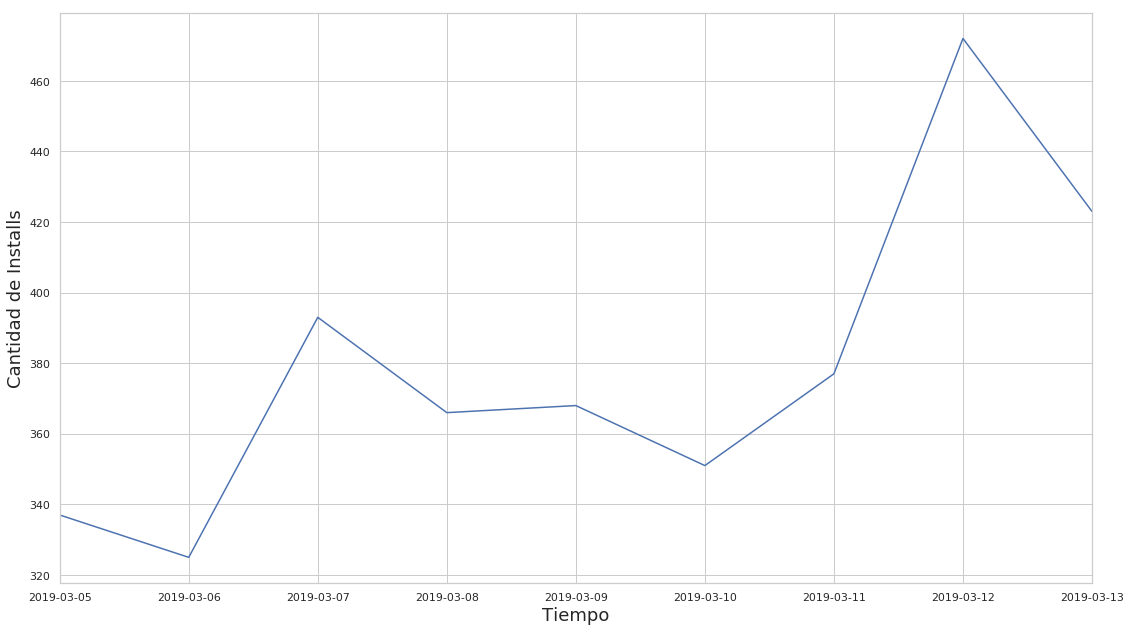

In [13]:
# utilizo la columna 'application_id' para contar xq tiene valor no nulo en todos los registros
installs_por_dia = installs.groupby('date')['application_id'].count()
g = installs_por_dia.plot()
g.set_xlabel("Tiempo", fontsize=18)
g.set_ylabel("Cantidad de Installs", fontsize=18)

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
#g.get_figure().savefig('img/cant_installs_por_dia.png')

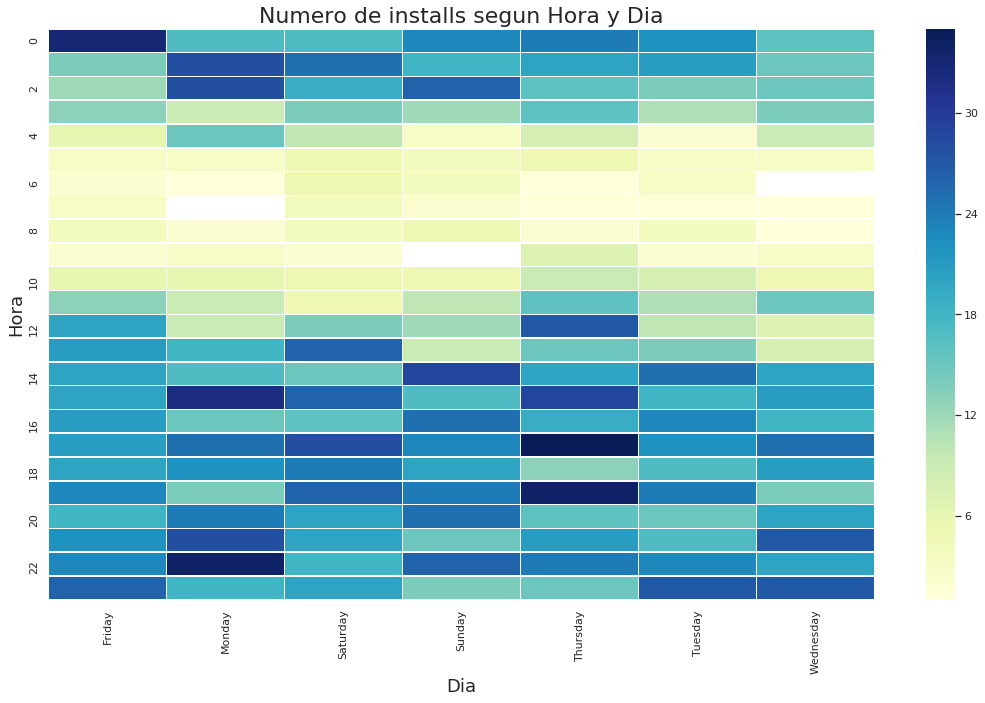

In [29]:
### Numero de installs realizados por dia.
# Filtro los dias 12 y 13 para que justo haya 1 semana de data
tabla_semanal = installs.loc[installs['day'] < 12,:]

for_heatmap_hr_day = tabla_semanal.pivot_table(index='hour', columns='weekday_name', values='counter', aggfunc='sum')

g = sns.heatmap(for_heatmap_hr_day , linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Numero de installs segun Hora y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Hora", fontsize=18)


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
#g.get_figure().savefig('img/installs_hr_dia.png')

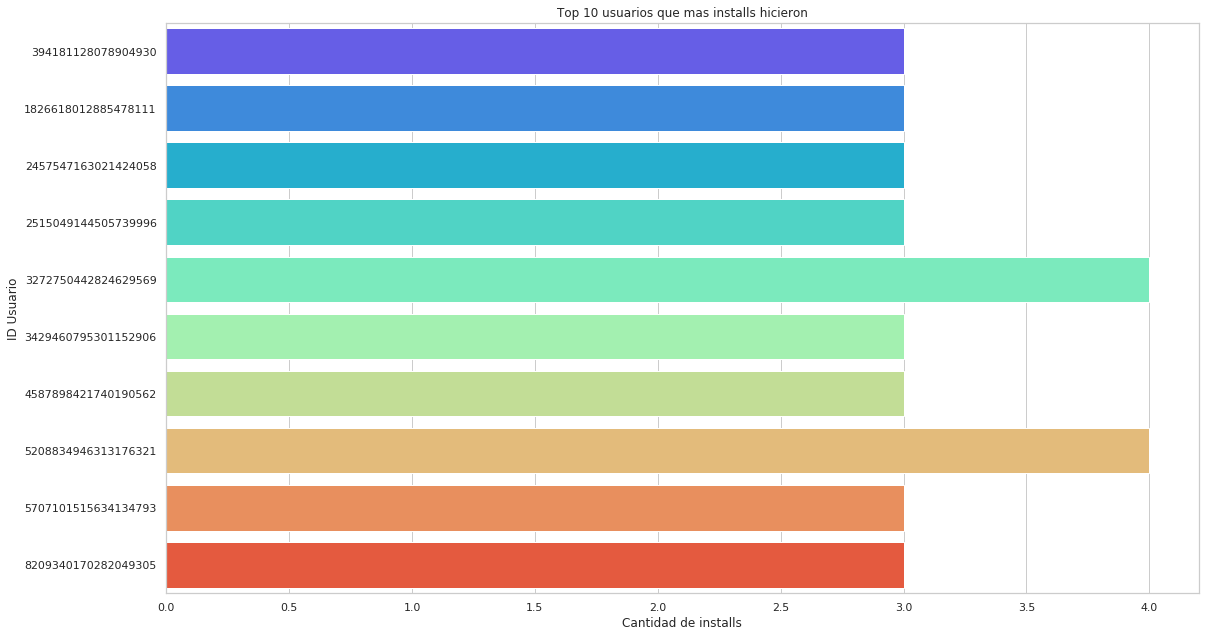

In [31]:
# utilizo la columna 'application_id' para contar xq tiene valor no nulo en todos los registros
usuarios = installs.groupby('ref_hash')['application_id'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=usuarios.values, y=usuarios.index, palette='rainbow', orient='h')
g.set_xlabel('Cantidad de installs')
g.set_ylabel('ID Usuario')
g.set_title('Top 10 usuarios que mas installs hicieron')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
#g.get_figure().savefig('img/top_10_usuarios_installs.png')

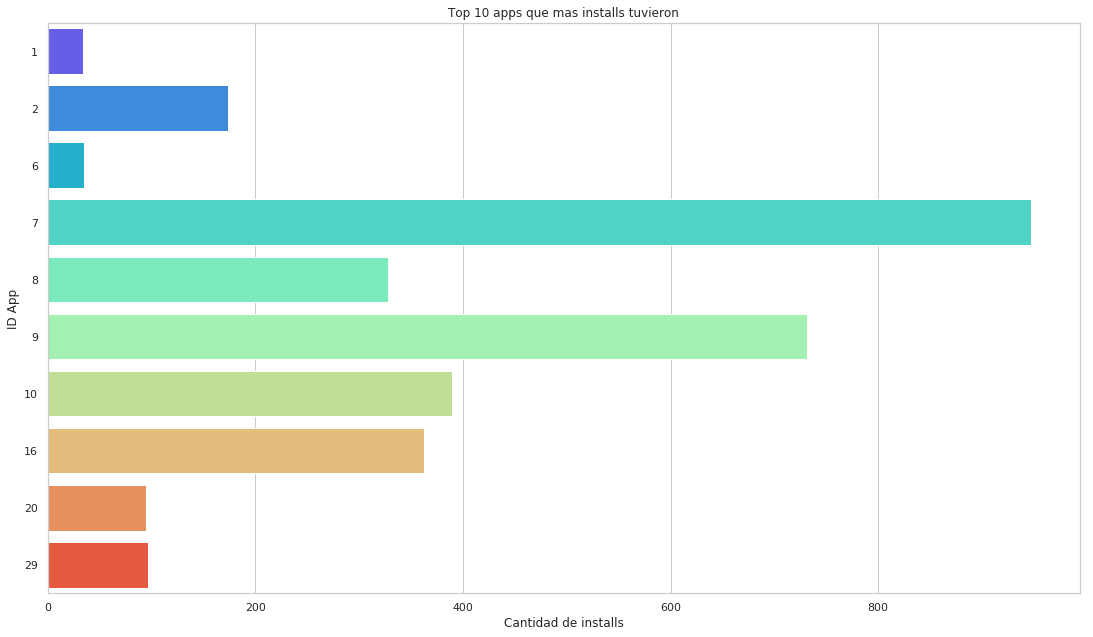

In [46]:
# utilizo la columna 'application_id' para contar xq tiene valor no nulo en todos los registros
usuarios = installs.groupby('application_id')['application_id'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=usuarios.values, y=usuarios.index, palette='rainbow', orient='h')
g.set_xlabel('Cantidad de installs')
g.set_ylabel('ID App')
g.set_title('Top 10 apps que mas installs tuvieron')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
#g.get_figure().savefig('img/top_10_apps_installs.png')

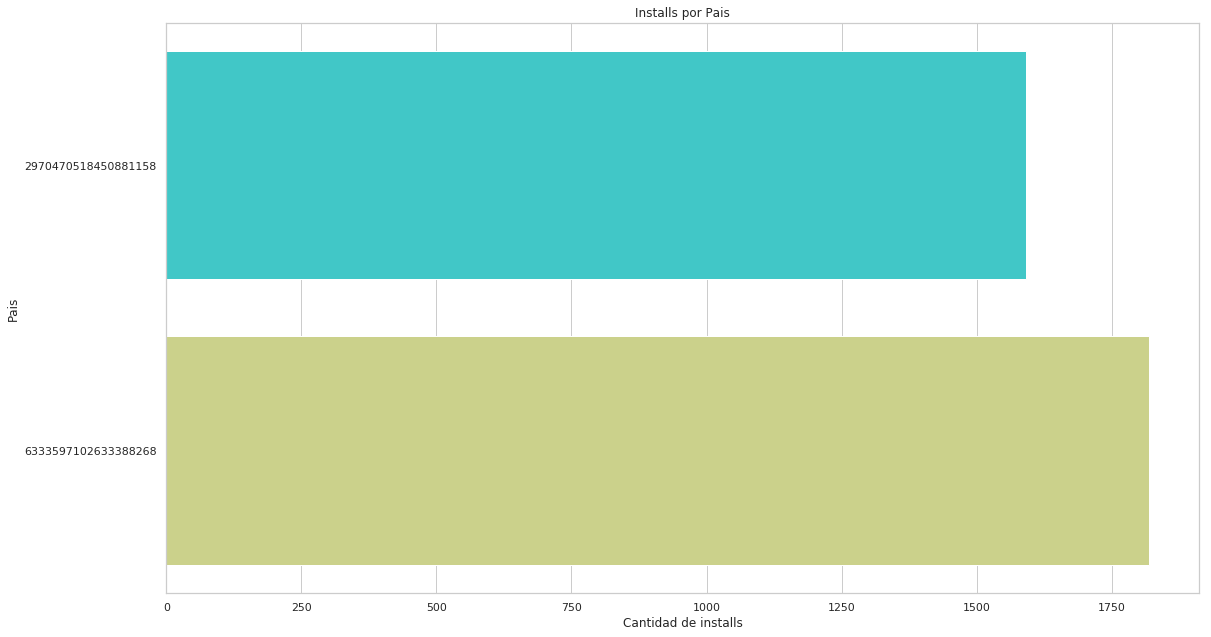

In [42]:
# utilizo la columna 'application_id' para contar xq tiene valor no nulo en todos los registros
usuarios = installs.groupby('device_countrycode')['application_id'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=usuarios.values, y=usuarios.index, palette='rainbow', orient='h')
g.set_xlabel('Cantidad de installs')
g.set_ylabel('Pais')
g.set_title('Installs por Pais')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
#g.get_figure().savefig('img/installs_por_pais.png')

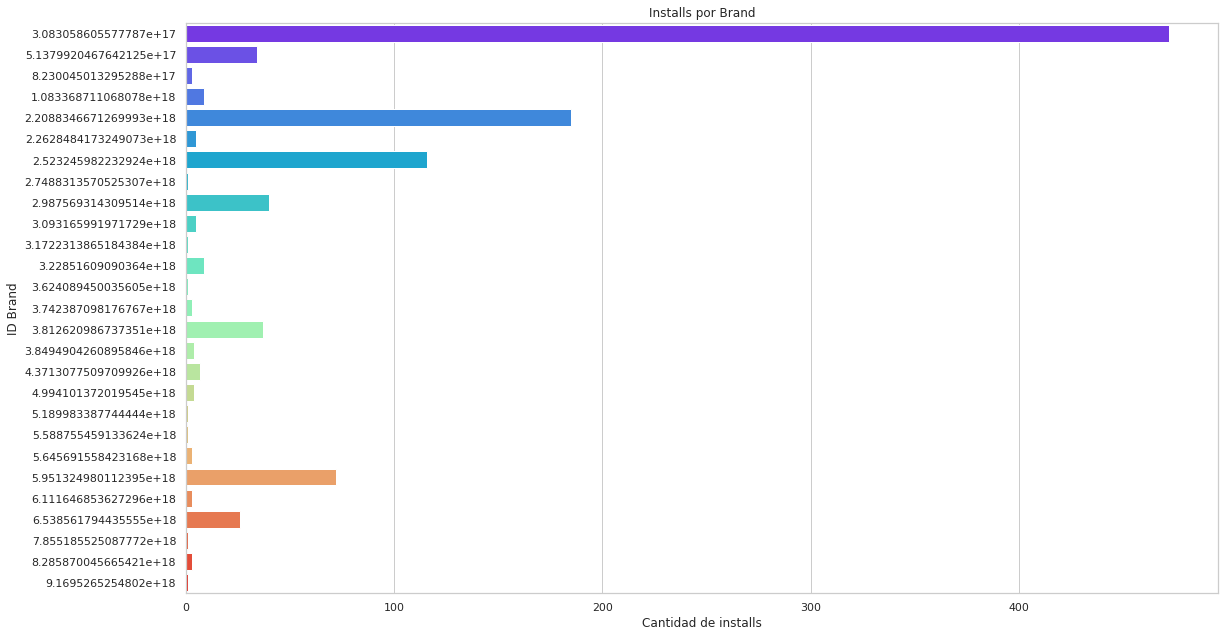

In [53]:
# utilizo la columna 'application_id' para contar xq tiene valor no nulo en todos los registros
usuarios = installs.groupby('device_brand')['application_id'].agg('count').sort_values(ascending=False)
g = sns.barplot(x=usuarios.values, y=usuarios.index, palette='rainbow', orient='h')
g.set_xlabel('Cantidad de installs')
g.set_ylabel('ID Brand')
g.set_title('Installs por Brand')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
#g.get_figure().savefig('img/top_10_brand_installs.png')

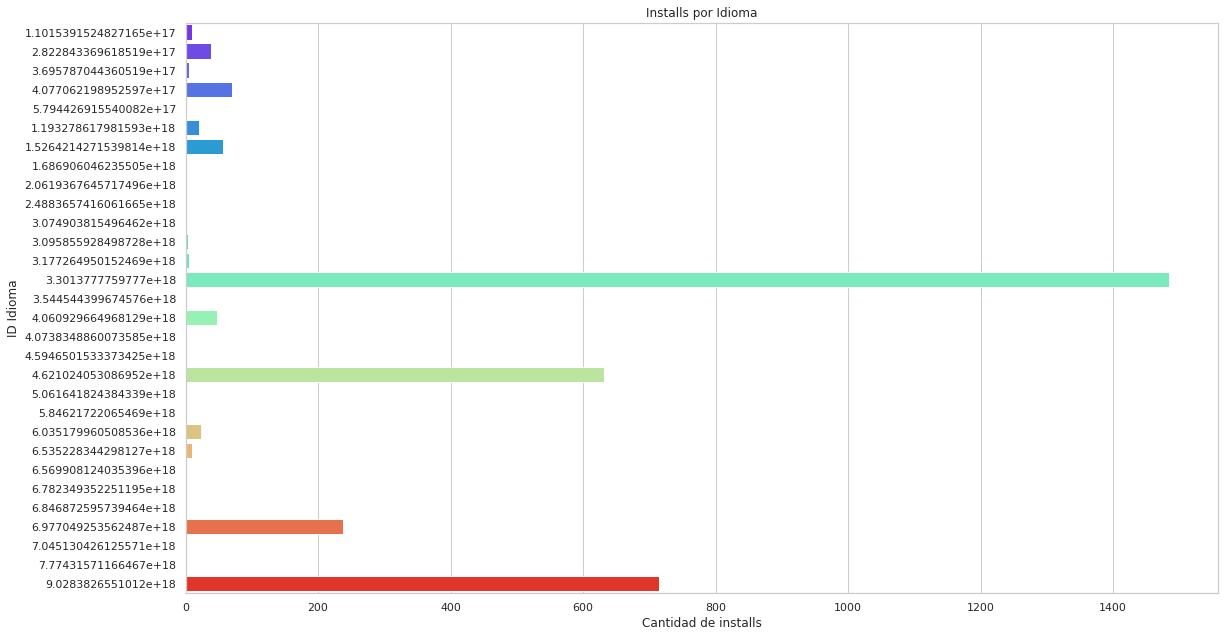

In [58]:
# utilizo la columna 'counter' para contar xq tiene valor no nulo en todos los registros
usuarios = installs.groupby('device_language')['counter'].agg('count').sort_values(ascending=False)
g = sns.barplot(x=usuarios.values, y=usuarios.index, palette='rainbow', orient='h')
g.set_xlabel('Cantidad de installs')
g.set_ylabel('ID Idioma')
g.set_title('Installs por Idioma')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
#g.get_figure().savefig('img/top_10_brand_installs.png')